In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import stock data from yahoo
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-17,662.909973,639.590027,640.299988,650.280029,30810900.0,650.280029
2022-06-21,730.729980,673.000000,673.809998,711.109985,40931000.0,711.109985
2022-06-22,740.500000,701.479980,703.510010,708.260010,33702500.0,708.260010
2022-06-23,717.950012,685.909973,713.719971,705.210022,34734200.0,705.210022
2022-06-24,738.200012,708.260010,712.409973,737.119995,31866500.0,737.119995


<AxesSubplot:xlabel='Date'>

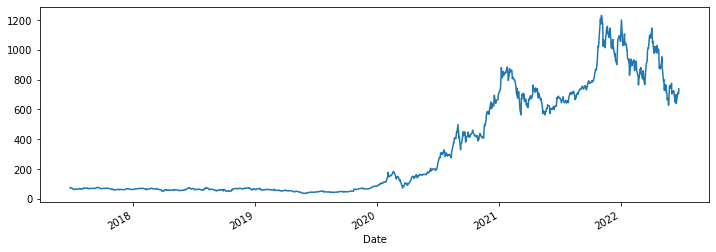

In [4]:
#plotting the closing price and sizing the chart
df_tesla["Close"].plot(figsize = (12,4))


<AxesSubplot:xlabel='Date'>

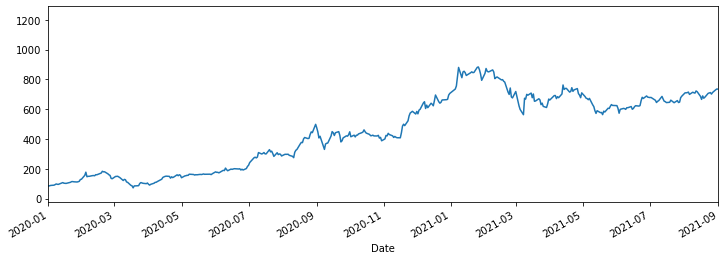

In [5]:
# set xlimit and y limit
df_tesla["Close"].plot(xlim = ['2020-01-01', '2021-09-01'],figsize = (12,4))


<AxesSubplot:xlabel='Date'>

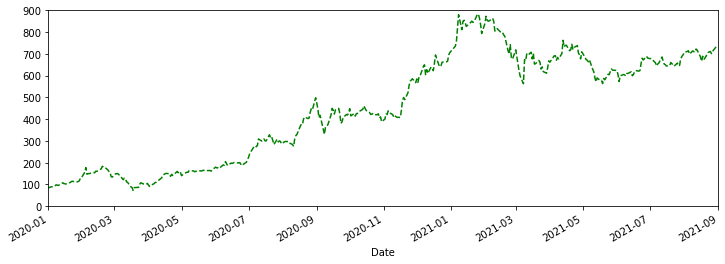

In [6]:
# add color and line type
df_tesla["Close"].plot(xlim = ['2020-01-01', '2021-09-01'], ylim = [0,900],figsize = (12,4),ls = "--", c= "green")


In [7]:
#to get all the dates
df_tesla.index

DatetimeIndex(['2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10',
               ...
               '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [8]:
# read first 4 rows
index = df_tesla.loc["2020-01-01":"2021-09-01"].index
share_open = df_tesla.loc["2020-01-01":"2021-09-01"]["Open"]

In [9]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

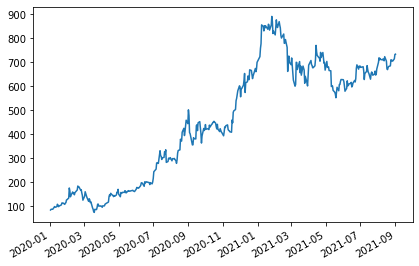

In [10]:
figure, axis = plt.subplots()
plt.tight_layout ()
#preventing date overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [11]:
## datetime index

In [12]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-06-26 to 2022-06-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 101.1 KB


In [13]:
# converting to datetime dont do it many times, risk of adding extra columns
df_tesla = df_tesla.reset_index()

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [15]:
 df_tesla = df_tesla.set_index(df_tesla["Date"])

In [16]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-06-26 to 2022-06-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.7 KB


### datetime 

In [17]:
# to measure a functions speed
# you wrap the called function in 
# start_time = datetime.now()
# add _num(num1,num2)
# end_time = datetime.now()
# print(end_time-start_time)

In [18]:
date = datetime(2021,11,21)

In [19]:
date.date()

datetime.date(2021, 11, 21)

In [20]:
date.day

21

In [21]:
date.weekday()

6

# time resampling

In [22]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-06-26,2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999
2017-06-28,2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001
2017-06-29,2017-06-29,74.199997,70.820000,74.122002,72.150002,41105000.0,72.150002
2017-06-30,2017-06-30,73.353996,71.924004,72.741997,72.321999,29242500.0,72.321999


In [29]:
df_tesla = df_tesla.drop(columns = ["Date"])


In [31]:
# brings end of year and frequency
# finding minimum value for end of year for all columns and rows
df_tesla.resample(rule = "A").min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [32]:
df_tesla.resample(rule = "A").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.536003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

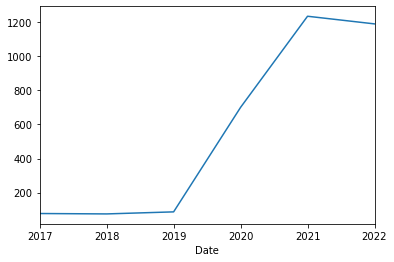

In [33]:
df_tesla.resample(rule = "A").max()["Open"].plot()

In [36]:
# quarterly start frequency
df_tesla.resample(rule = "QS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-01,77.389999,74.620003,77.337997,75.498001,41105000.0,75.498001
2017-07-01,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000


<AxesSubplot:xlabel='Date'>

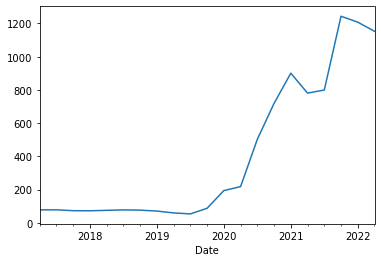

In [38]:
df_tesla.resample(rule = "QS").max()["High"].plot()

In [42]:
#business endof year frequency
df_tesla.resample(rule = "BA").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.536003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [43]:
df_tesla.resample(rule = "BQS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,77.389999,74.620003,77.337997,75.498001,41105000.0,75.498001
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000


<AxesSubplot:xlabel='Date'>

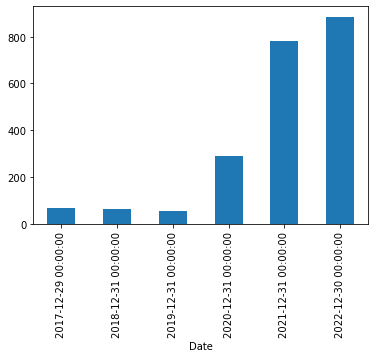

In [47]:
# plotting
df_tesla["Open"].resample(rule = "BA").mean().plot(kind = "bar")

<AxesSubplot:xlabel='Date'>

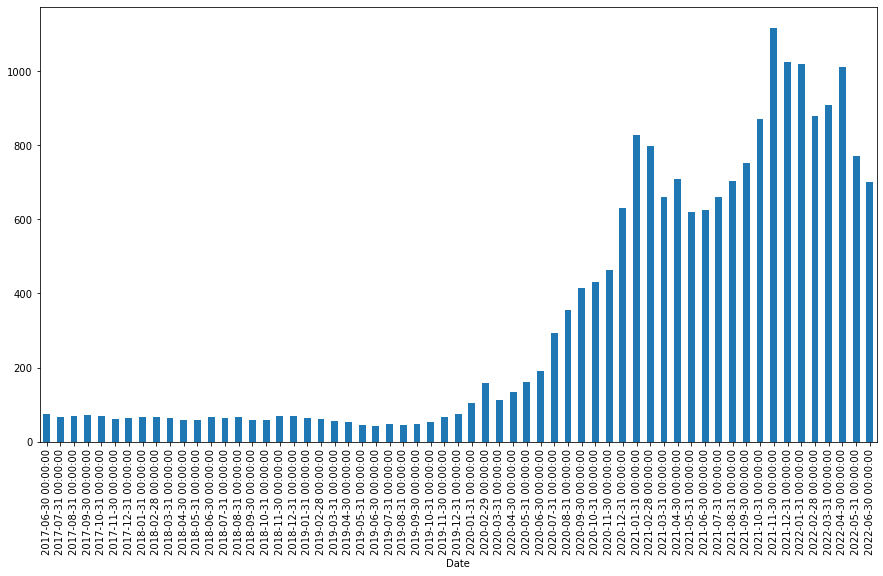

In [56]:
df_tesla["Open"].resample(rule = "M").mean().plot(kind = "bar",figsize = (15, 8))

# Rolling

In [68]:
# rolling on the first 10 Highs down 10 places and finds the average of that 10th day with the first day
df_tesla["High"].rolling(10).mean().head(20)

Date
2017-06-26          NaN
2017-06-27          NaN
2017-06-28          NaN
2017-06-29          NaN
2017-06-30          NaN
2017-07-03          NaN
2017-07-05          NaN
2017-07-06          NaN
2017-07-07          NaN
2017-07-10    70.943599
2017-07-11    69.750199
2017-07-12    68.884199
2017-07-13    68.081399
2017-07-14    67.229799
2017-07-17    66.436399
2017-07-18    65.591999
2017-07-19    65.280200
2017-07-20    65.468800
2017-07-21    65.754000
2017-07-24    66.263200
Name: High, dtype: float64

In [65]:
df_tesla['High'].head(20)

Date
2017-06-26    77.389999
2017-06-27    75.279999
2017-06-28    74.348000
2017-06-29    74.199997
2017-06-30    73.353996
2017-07-03    74.269997
2017-07-05    69.447998
2017-07-06    64.157997
2017-07-07    63.400002
2017-07-10    63.588001
2017-07-11    65.456001
2017-07-12    66.620003
2017-07-13    66.320000
2017-07-14    65.683998
2017-07-17    65.419998
2017-07-18    65.825996
2017-07-19    66.330002
2017-07-20    66.043999
2017-07-21    66.251999
2017-07-24    68.680000
Name: High, dtype: float64

In [72]:
df_tesla["Open: 30 days rolling"]= df_tesla['Open'].rolling(30).mean()
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days rolling
Date,,,,,,,
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001,NaN
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999,NaN
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001,NaN
2017-06-29,74.199997,70.820000,74.122002,72.150002,41105000.0,72.150002,NaN
2017-06-30,73.353996,71.924004,72.741997,72.321999,29242500.0,72.321999,NaN
2017-07-03,74.269997,70.300003,74.047997,70.524002,31527000.0,70.524002,NaN
2017-07-05,69.447998,65.265999,69.440002,65.417999,85233500.0,65.417999,NaN
2017-07-06,64.157997,61.259998,63.452000,61.765999,96622500.0,61.765999,NaN
2017-07-07,63.400002,61.476002,62.700001,62.644001,70884500.0,62.644001,NaN


<AxesSubplot:xlabel='Date'>

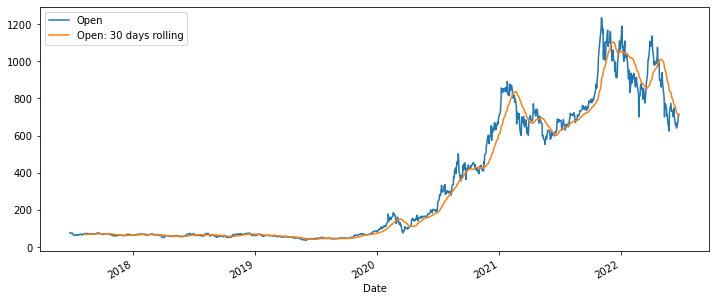

In [73]:
df_tesla[["Open", "Open: 30 days rolling"]].plot(figsize = (12,5))